### Natural Language Processing of Disaster Tweets
### Vivian Do
### October 23, 2022

Note: Original dataframe was modified using Microsoft Excel to delete unrelated tweets and fill in missing keywords 

In [1]:
#[1]

#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import statistics as stats

#If not already installed
#pip install stylecloud

In [2]:
#[2]
#Import training and test set

url='https://raw.githubusercontent.com/purushothamaraj/NLP-of-Disaster-Tweets/main/tweets_train_filled.csv'
url_test='https://raw.githubusercontent.com/purushothamaraj/NLP-of-Disaster-Tweets/main/tweets_test.csv'
url_train='https://raw.githubusercontent.com/purushothamaraj/NLP-of-Disaster-Tweets/main/tweets_train.csv'
train=pd.read_csv(url_train)
test=pd.read_csv(url_test)

In [3]:
#[3]

#Show dimensions 
#training
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])

#test
print("Number of rows:", test.shape[0])
print("Number of columns:", test.shape[1])

Number of rows: 7613
Number of columns: 5
Number of rows: 3263
Number of columns: 4


In [4]:
#[4]
#Display fields in training set
train.columns.values.tolist()

['id', 'keyword', 'location', 'text', 'target']

In [5]:
#[5]
#Display fields in test set
test.columns.values.tolist()

#'target' field is only in training set. This is what we are predicting for test set

['id', 'keyword', 'location', 'text']

In [6]:
#[6]
#Datatypes Train data
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [7]:
#[7]

#Datatypes Test data
test.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

In [8]:
#[8]
#There are 110 duplicated tweets in training set and 20 in the test set. 
print(train.duplicated(subset=['text']).sum())
print(test.duplicated(subset=['text']).sum())

110
20


In [9]:
#[9]
#Drop duplicated tweets and confirm that they are dropped. 
#By default, the drop_duplicates() function deletes all duplicates except the first entry (keep=first)
#Inplace=True changes source dataframe 
train.drop_duplicates(subset ='text',
                     inplace=True)
test.drop_duplicates(subset ='text',
                     inplace=True)
print(train.duplicated(subset=['text']).sum())
print(test.duplicated(subset=['text']).sum())

0
0


In [10]:
#[10]
#Dimensions after duplicated tweets are deleted. These numbers now match the number of unique tweets. 
#training
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])

#test
print("Number of rows:", test.shape[0])
print("Number of columns:", test.shape[1])

Number of rows: 7503
Number of columns: 5
Number of rows: 3243
Number of columns: 4


In [11]:
#[11]
#Show all null values in training set
train.isnull().sum()

id             0
keyword       56
location    2482
text           0
target         0
dtype: int64

In [12]:
#[12]
#Show all null values in test set
test.isnull().sum()

id             0
keyword       26
location    1097
text           0
dtype: int64

There is a significant number of null values for location for both sets (about 33%). Keyword has been manually filled in for training set ONLY

In [13]:
#[13]
#Show number of unique entries for each field
print(train['location'].nunique())
print(train['keyword'].nunique())
print(train['text'].nunique())
print(train['id'].nunique())

print(test['location'].nunique())
print(test['keyword'].nunique())
print(test['text'].nunique())
print(test['id'].nunique())

3327
221
7503
7503
1599
221
3243
3243


In [14]:
#[14]
#Add 'character_count' column to display the number of characters used in each tweet
train['character_count']=train['text'].str.len()
train.head()

,id,keyword,location,text,target,character_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


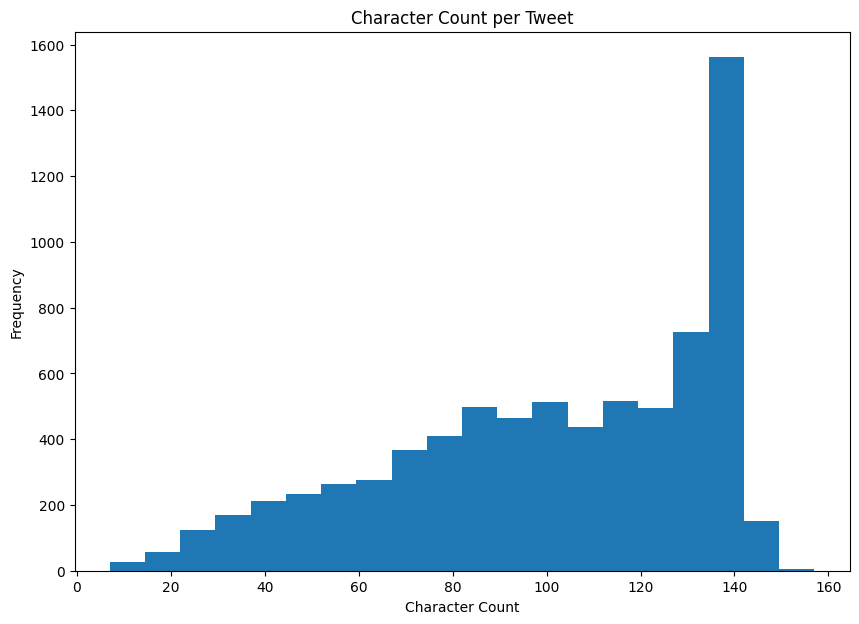

In [15]:
#[15]
#Frequency of character_counts per tweet
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(train['character_count'],bins=20)
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.title("Character Count per Tweet")

# Show plot
plt.show()

Text(0.5, 1.0, 'Distribution of Character Count per Target')

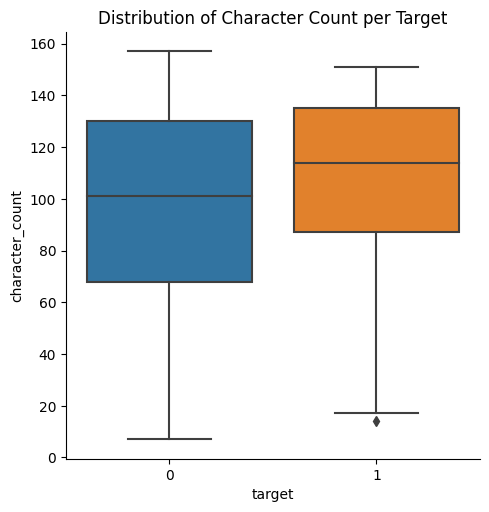

In [16]:
#[16]
#Boxplot of distribution of character count for each target
sns.catplot(data=train, x="target", y="character_count", kind="box")
plt.title("Distribution of Character Count per Target")

In [17]:
#[17]
#Show mean/median character_count for each value of target
character_count_per_target=train.groupby('target').agg({'character_count':['mean','median']})
print(character_count_per_target)

       character_count       
                  mean median
target                       
0            95.605110  101.0
1           107.982176  114.0


In [18]:
#[18]
train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [19]:
#[19]
test['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [20]:
#[20]
#Remove spaces in keywords(which show up as %20)
train['keyword'] = train['keyword'].str.replace(r'(%|\s*20)', '', regex=True)
train

,id,keyword,location,text,target,character_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,136
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1,114
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,121
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83


In [21]:
#[21]
#Remove spaces in keywords(which show up as %20)
test['keyword'] = test['keyword'].str.replace(r'(%|\s*20)', '', regex=True)
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [22]:
#[22]
#Show all unique keywords after removing spaces
train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplaneaccident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blewup', 'blight', 'blizzard', 'blood',
       'bloody', 'blownup', 'bodybag', 'bodybagging', 'bodybags', 'bomb',
       'bombed', 'bombing', 'bridgecollapse', 'buildingsburning',
       'buildingsonfire', 'burned', 'burning', 'burningbuildings',
       'bushfires', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemicalemergency', 'clifffall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash',
       'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage',
       'danger', 'dead', 'death', 'deaths', 'debris', 'deluge', 'deluged',
       'demolish', 'demolished', 'demolition', 'derail', 'derailed',
       'derailment', 'desolate', 'desolat

In [23]:
#[23]
#Stemming of training keywords

# library to clean data
import re
 
# Natural Language Tool Kit
import nltk
 
nltk.download('stopwords')
 
# to remove stopword
from nltk.corpus import stopwords
 
# for Stemming propose
from nltk.stem.porter import PorterStemmer
 
porter = PorterStemmer()

#A list of words to be stemmed
keyword_list = ['earthquake', 'forestfire', 'evacuation', 'wildfires', 'flood',
       'fire', 'tornado', 'heatwave', 'flooding', 'crash', 'ablaze',
       'accident', 'aftershock', 'airplaneaccident', 'ambulance',
       'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army',
       'arson', 'arsonist', 'attack', 'attacked', 'avalanche', 'battle',
       'bioterror', 'bioterrorism', 'blaze', 'blazing', 'bleeding',
       'blewup', 'blight', 'blizzard', 'blood', 'bloody', 'blownup',
       'bodybag', 'bodybagging', 'bodybags', 'bomb', 'bombed', 'bombing',
       'bridgecollapse', 'buildingsburning', 'buildingsonfire', 'burned',
       'burning', 'burningbuildings', 'bushfires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemicalemergency',
       'clifffall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone',
       'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge',
       'deluged', 'demolish', 'demolished', 'demolition', 'derail',
       'derailed', 'derailment', 'desolate', 'desolation', 'destroy',
       'destroyed', 'destruction', 'detonate', 'detonation', 'devastated',
       'devastation', 'disaster', 'displaced', 'drought', 'drown',
       'drowned', 'drowning', 'duststorm', 'electrocute', 'electrocuted',
       'emergency', 'emergencyplan', 'emergencyservices', 'engulfed',
       'epicentre', 'evacuate', 'evacuated', 'explode', 'exploded',
       'explosion', 'eyewitness', 'famine', 'fatal', 'fatalities',
       'fatality', 'fear', 'firetruck', 'firstresponders', 'flames',
       'flattened', 'floods', 'forestfires', 'hail', 'hailstorm', 'harm',
       'hazard', 'hazardous', 'hellfire', 'hijack', 'hijacker',
       'hijacking', 'hostage', 'hostages', 'hurricane', 'injured',
       'injuries', 'injury', 'inundated', 'inundation', 'landslide',
       'lava', 'lightning', 'loudbang', 'massmurder', 'massmurderer',
       'massacre', 'mayhem', 'meltdown', 'military', 'mudslide',
       'naturaldisaster', 'nucleardisaster', 'nuclearreactor',
       'obliterate', 'obliterated', 'obliteration', 'oilspill',
       'outbreak', 'pandemonium', 'panic', 'panicking', 'police',
       'quarantine', 'quarantined', 'radiationemergency', 'rainstorm',
       'razed', 'refugees', 'rescue', 'rescued', 'rescuers', 'riot',
       'rioting', 'rubble', 'ruin', 'sandstorm', 'screamed', 'screaming',
       'screams', 'seismic', 'sinkhole', 'sinking', 'siren', 'sirens',
       'smoke', 'snowstorm', 'storm', 'stretcher', 'structuralfailure',
       'suicidebomb', 'suicidebomber', 'suicidebombing', 'sunk',
       'survive', 'survived', 'survivors', 'terrorism', 'terrorist',
       'threat', 'thunder', 'thunderstorm', 'tragedy', 'trapped',
       'trauma', 'traumatised', 'trouble', 'tsunami', 'twister',
       'typhoon', 'upheaval', 'violentstorm', 'volcano', 'warzone',
       'weapon', 'weapons', 'whirlwind', 'wildfire', 'windstorm',
       'wounded', 'wounds', 'wreck', 'wreckage', 'wrecked']

print("{0:20}{1:20}".format("Keyword","Stem"))
for word in keyword_list:
    print("{0:20}{1:20}".format(word,porter.stem(word)))

Keyword             Stem                
earthquake          earthquak           
forestfire          forestfir           
evacuation          evacu               
wildfires           wildfir             
flood               flood               
fire                fire                
tornado             tornado             
heatwave            heatwav             
flooding            flood               
crash               crash               
ablaze              ablaz               
accident            accid               
aftershock          aftershock          
airplaneaccident    airplaneaccid       
ambulance           ambul               
annihilated         annihil             
annihilation        annihil             
apocalypse          apocalyps           
armageddon          armageddon          
army                armi                
arson               arson               
arsonist            arsonist            
attack              attack              
attacked        

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
#[24]
#Create new column for stemmed keywords
keyword_list = ['earthquake', 'forestfire', 'evacuation', 'wildfires', 'flood',
       'fire', 'tornado', 'heatwave', 'flooding', 'crash', 'ablaze',
       'accident', 'aftershock', 'airplaneaccident', 'ambulance',
       'annihilated', 'annihilation', 'apocalypse', 'armageddon', 'army',
       'arson', 'arsonist', 'attack', 'attacked', 'avalanche', 'battle',
       'bioterror', 'bioterrorism', 'blaze', 'blazing', 'bleeding',
       'blewup', 'blight', 'blizzard', 'blood', 'bloody', 'blownup',
       'bodybag', 'bodybagging', 'bodybags', 'bomb', 'bombed', 'bombing',
       'bridgecollapse', 'buildingsburning', 'buildingsonfire', 'burned',
       'burning', 'burningbuildings', 'bushfires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemicalemergency',
       'clifffall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone',
       'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge',
       'deluged', 'demolish', 'demolished', 'demolition', 'derail',
       'derailed', 'derailment', 'desolate', 'desolation', 'destroy',
       'destroyed', 'destruction', 'detonate', 'detonation', 'devastated',
       'devastation', 'disaster', 'displaced', 'drought', 'drown',
       'drowned', 'drowning', 'duststorm', 'electrocute', 'electrocuted',
       'emergency', 'emergencyplan', 'emergencyservices', 'engulfed',
       'epicentre', 'evacuate', 'evacuated', 'explode', 'exploded',
       'explosion', 'eyewitness', 'famine', 'fatal', 'fatalities',
       'fatality', 'fear', 'firetruck', 'firstresponders', 'flames',
       'flattened', 'floods', 'forestfires', 'hail', 'hailstorm', 'harm',
       'hazard', 'hazardous', 'hellfire', 'hijack', 'hijacker',
       'hijacking', 'hostage', 'hostages', 'hurricane', 'injured',
       'injuries', 'injury', 'inundated', 'inundation', 'landslide',
       'lava', 'lightning', 'loudbang', 'massmurder', 'massmurderer',
       'massacre', 'mayhem', 'meltdown', 'military', 'mudslide',
       'naturaldisaster', 'nucleardisaster', 'nuclearreactor',
       'obliterate', 'obliterated', 'obliteration', 'oilspill',
       'outbreak', 'pandemonium', 'panic', 'panicking', 'police',
       'quarantine', 'quarantined', 'radiationemergency', 'rainstorm',
       'razed', 'refugees', 'rescue', 'rescued', 'rescuers', 'riot',
       'rioting', 'rubble', 'ruin', 'sandstorm', 'screamed', 'screaming',
       'screams', 'seismic', 'sinkhole', 'sinking', 'siren', 'sirens',
       'smoke', 'snowstorm', 'storm', 'stretcher', 'structuralfailure',
       'suicidebomb', 'suicidebomber', 'suicidebombing', 'sunk',
       'survive', 'survived', 'survivors', 'terrorism', 'terrorist',
       'threat', 'thunder', 'thunderstorm', 'tragedy', 'trapped',
       'trauma', 'traumatised', 'trouble', 'tsunami', 'twister',
       'typhoon', 'upheaval', 'violentstorm', 'volcano', 'warzone',
       'weapon', 'weapons', 'whirlwind', 'wildfire', 'windstorm',
       'wounded', 'wounds', 'wreck', 'wreckage', 'wrecked']
# for word in keyword_list:
#   train['stem'] = train.keyword.apply(porter.stem)
for word in keyword_list:
  train['stem'] = train.keyword.apply(lambda x: porter.stem(x) if pd.notna(x) else x)


In [25]:
#[25]
train.head(10)

,id,keyword,location,text,target,character_count,stem
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,NaN
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,NaN
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,NaN
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,NaN
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,NaN
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110,NaN
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95,NaN
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59,NaN
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79,NaN
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52,NaN


In [26]:
#[26]
train['stem'].nunique()

165

In [27]:
#[27]
#Show most commonly used keywords in training
(train.keyword.value_counts()).head(20)

fatalities    45
deluge        42
armageddon    42
damage        41
bodybags      41
harm          41
windstorm     40
twister       40
siren         40
evacuate      40
fear          40
flames        39
explosion     39
collision     39
earthquake    39
outbreak      39
famine        39
sinkhole      39
sunk          39
weapon        39
Name: keyword, dtype: int64

Top 5 keywords used overall: (65) ablaze, (45) fatalities, (42) armageddon, deluge, (41) harm, bodybags, damage, (40) earthquake,collided, fear, sinking, siren,evacuate, outbreak, windstorm

In [28]:
#[28]
#Show most commly used stemmed keywords in training
(train.stem.value_counts()).head(20)

fatal          111
evacu          109
flood          107
bodybag        107
derail         106
scream         105
drown          104
bomb           100
hijack          98
suicidebomb     93
obliter         91
weapon          78
wreck           76
death           74
collid          73
blaze           72
quarantin       71
attack          71
explod          70
wound           70
Name: stem, dtype: int64

Top 5 stemmed-keywords used overall: (117) fatal, (111) evacu, flood, (107) bodybag, (106) derail, (105) scream

In [29]:
#[29]
#Show most commonly used keywords in test
(test.keyword.value_counts()).head(24)

deluged            23
demolished         22
rubble             22
obliteration       21
seismic            21
snowstorm          21
sirens             21
annihilation       21
firstresponders    21
dead               20
mayhem             20
avalanche          20
catastrophic       20
survivors          20
obliterate         19
hostage            19
devastated         19
trauma             19
wildfires          19
obliterated        19
terrorist          19
suicidebomber      19
crushed            19
bioterrorism       19
Name: keyword, dtype: int64

In [30]:
#[30]
#Top 5 keywords associated with disaster and non-disasters
train_1=train.loc[:, ['keyword', 'target']]
train_keyword_per_target = train_1.groupby('keyword')
train_keyword_per_target.value_counts().sort_values(ascending=False).head(30)

keyword      target
bodybags     0         40
outbreak     1         38
armageddon   0         37
oilspill     1         37
wreckage     1         37
debris       1         37
harm         0         37
ruin         0         36
wrecked      0         36
deluge       0         36
explode      0         35
typhoon      1         35
siren        0         35
twister      0         35
fear         0         35
panic        0         34
screaming    0         34
derailment   1         33
crush        0         33
blizzard     0         33
traumatised  0         33
blazing      0         33
blaze        0         33
curfew       0         32
bodybag      0         32
evacuated    1         32
upheaval     0         32
bloody       0         32
aftershock   0         32
smoke        0         31
dtype: int64

Top keywords associated with real disasters: (37) deaths, (36) oilspill, (34) ablaze, (33) evacuate, (33) suicidebomb,(31) derailed

Top keywords associated with a non-disasters: (37) blaze, (36) armageddon, (34) sinking, (34) panic, (34) harm,(33) crush, pandemonium, (32)screaming, injury, blood, blizzard, bleeding, siren, sunk, flames, deluge       

In [31]:
#[31]
##Show highest percentages of real and non-disasters for all keywords##

(train_keyword_per_target.value_counts(normalize=True) * 100).sort_values(ascending=False).head(20)

keyword         target
aftershock      0         100.000000
wreckage        1         100.000000
derailment      1         100.000000
debris          1         100.000000
bodybags        0          97.560976
outbreak        1          97.435897
oilspill        1          97.368421
ruin            0          97.297297
typhoon         1          97.222222
blazing         0          97.058824
bodybag         0          96.969697
electrocute     0          96.875000
suicidebombing  1          96.875000
suicidebomber   1          96.774194
screaming       0          94.444444
traumatised     0          94.285714
panicking       0          93.939394
blewup          0          93.939394
blight          0          93.750000
bombing         1          92.857143
dtype: float64

Highest percentage of real disaster per usage: deaths, oilspill, suicidebomb, suicidebomber, obliteration

Highest percentage of non-real disaster per usage:blaze, rubble, bodybagging, blownup, blewup

In [32]:
#[32]
#Select only rows w/ top 5 keywords used in real disasters and sort by keyword. 
train_top5_keyword = train_1.loc[train_1['keyword'].isin(['deaths', 'oilspill', 'ablaze', 'evacuate', 'suicidebomb', 'derailed'])]
train_top5_keyword_1 = train_top5_keyword.groupby('keyword')
train_top5_keyword_1.value_counts().head(30)

keyword      target
ablaze       0         22
             1         13
deaths       1         26
             0         12
derailed     1         26
             0         12
evacuate     1         25
             0         15
oilspill     1         37
             0          1
suicidebomb  1         27
             0          3
dtype: int64

In [33]:
#[33]
#Top 5 most frequently used keywords in real disasters in percentages 
(train_top5_keyword_1.value_counts(normalize=True) * 100).sort_values(ascending=False).head(50)

keyword      target
oilspill     1         97.368421
suicidebomb  1         90.000000
deaths       1         68.421053
derailed     1         68.421053
ablaze       0         62.857143
evacuate     1         62.500000
             0         37.500000
ablaze       1         37.142857
deaths       0         31.578947
derailed     0         31.578947
suicidebomb  0         10.000000
oilspill     0          2.631579
dtype: float64

In [34]:
#[34]
#Select only rows w/ top 5 keywords used in non-real disasters and sort by keyword.
train_top5_keyword_non = train_1.loc[train_1['keyword'].isin(
    ['blaze', 'armageddon', 'sinking', 'panic', 'harm','crush', 'pandemonium', 
    'screaming', 'injury', 'blood', 'blizzard', 'bleeding', 'siren', 'sunk', 'flames', 'deluge'])]
train_top5_keyword_2 = train_top5_keyword_non.groupby('keyword')
train_top5_keyword_2.value_counts().head(50)

keyword      target
armageddon   0         37
             1          5
blaze        0         33
             1          5
bleeding     0         30
             1          5
blizzard     0         33
             1          4
blood        0         30
             1          5
crush        0         33
             1          4
deluge       0         36
             1          6
flames       0         26
             1         13
harm         0         37
             1          4
injury       0         26
             1          8
pandemonium  0         29
             1          8
panic        0         34
             1          3
screaming    0         34
             1          2
sinking      0         31
             1          7
siren        0         35
             1          5
sunk         0         30
             1          9
dtype: int64

In [35]:
#[35]
#Top 5 stems most frequently associated with disaster and non-disasters
train_2=train.loc[:, ['stem', 'target']]
train_stem_per_target = train_2.groupby('stem')
train_stem_per_target.value_counts().sort_values(ascending=False).head(20)

stem         target
bodybag      0         100
scream       0          94
suicidebomb  1          88
evacu        1          83
obliter      0          79
drown        0          77
derail       1          76
flood        1          66
wreck        0          66
blaze        0          66
bomb         1          60
crush        0          60
explod       0          58
fatal        0          58
siren        0          57
wildfir      1          56
delug        0          56
fatal        1          53
quarantin    0          52
electrocut   0          52
dtype: int64

Top 5 stems associated with disaster: (82) flood, (73) bomb, (72) suicidebomb, (69) derail, evacu, (57) death

Top 5 stems associated with non-disaster: (88) bodybag, (84) scream, (74) fatal, (67) blaze, (60) drown

In [36]:
#[36]
#Show highest percentages of real and non-disasters for all keywords
(train_keyword_per_target.value_counts(normalize=True) * 100).sort_values(ascending=False).head(50)


keyword          target
aftershock       0         100.000000
wreckage         1         100.000000
derailment       1         100.000000
debris           1         100.000000
bodybags         0          97.560976
outbreak         1          97.435897
oilspill         1          97.368421
ruin             0          97.297297
typhoon          1          97.222222
blazing          0          97.058824
bodybag          0          96.969697
electrocute      0          96.875000
suicidebombing   1          96.875000
suicidebomber    1          96.774194
screaming        0          94.444444
traumatised      0          94.285714
panicking        0          93.939394
blewup           0          93.939394
blight           0          93.750000
bombing          1          92.857143
wrecked          0          92.307692
explode          0          92.105263
hellfire         0          92.000000
panic            0          91.891892
epicentre        0          91.666667
bloody           0        

In [37]:
#[37]
#Show highest percentages of real and non-disasters for all stems
(train_stem_per_target.value_counts(normalize=True) * 100).sort_values(ascending=False).head(50)

stem            target
wreckag         1         100.000000
debri           1         100.000000
aftershock      0         100.000000
outbreak        1          97.435897
oilspil         1          97.368421
ruin            0          97.297297
typhoon         1          97.222222
suicidebomb     1          94.623656
traumatis       0          94.285714
panick          0          93.939394
blewup          0          93.939394
blight          0          93.750000
bodybag         0          93.457944
hellfir         0          92.000000
panic           0          91.891892
epicentr        0          91.666667
blaze           0          91.666667
bloodi          0          91.428571
smoke           0          91.176471
nucleardisast   1          91.176471
stretcher       0          90.909091
rescuer         1          90.625000
harm            0          90.243902
mayhem          0          90.000000
scream          0          89.523810
blizzard        0          89.189189
raze           

Highest percentage of real disaster per usage: oilspil, structuralfailur,rainstorm, naturaldisast, bushfir

Highest percentage of non-real disaster per usage: rubbl,blownup, blewup, trauma, blaze

In [38]:
#[38]
#Show counts for highest percentage of real and non-disasters in stems (of cell above)
train_highest_perct= train_2.loc[train_2['stem'].isin(['oilspil', 'structuralfailur', 'rainstorm', 'naturaldisast','bushfir','rubbl','blownup','blewup','trauma','blaze'])]
train_highest_perct2 = train_highest_perct.groupby('stem')
train_highest_perct2.value_counts()

stem              target
blaze             0         66
                  1          6
blewup            0         31
                  1          2
blownup           0         28
                  1          5
bushfir           1         18
                  0          7
naturaldisast     1         17
                  0         16
oilspil           1         37
                  0          1
rainstorm         1         18
                  0         16
rubbl             0         18
                  1         10
structuralfailur  1         23
                  0         12
trauma            0         20
                  1         11
dtype: int64

In [39]:
#[39]
#Select top 5 stems used most frequently in real disasters and show percentage 
train_top5_stem = train_2.loc[train_2['stem'].isin(['flood','bomb', 'suicidebomb', 'derail', 'evacu','death'])]
train_top5_stem_1 = train_top5_stem.groupby('stem')
train_top5_stem_1.value_counts().head(30)

stem         target
bomb         1         60
             0         40
death        0         39
             1         35
derail       1         76
             0         30
evacu        1         83
             0         26
flood        1         66
             0         41
suicidebomb  1         88
             0          5
dtype: int64

In [40]:
#[40]
#Top 5 most frequently used stems in real disaster in percentage 
(train_top5_stem_1.value_counts(normalize=True) * 100).sort_values(ascending=False).head(50)

stem         target
suicidebomb  1         94.623656
evacu        1         76.146789
derail       1         71.698113
flood        1         61.682243
bomb         1         60.000000
death        0         52.702703
             1         47.297297
bomb         0         40.000000
flood        0         38.317757
derail       0         28.301887
evacu        0         23.853211
suicidebomb  0          5.376344
dtype: float64

In [41]:
#[41]
#Select top 5 stems used most frequently in non-disasters
train_top5_stem_non = train_2.loc[train_2['stem'].isin(['bodybag', 'scream', 'fatal', 'blaze', 'drown'])]
train_top5_stem_2 = train_top5_stem_non.groupby('stem')
train_top5_stem_2.value_counts().head(30)

stem     target
blaze    0          66
         1           6
bodybag  0         100
         1           7
drown    0          77
         1          27
fatal    0          58
         1          53
scream   0          94
         1          11
dtype: int64

In [42]:
#[42]
#Top 5 most frequently used stems in non-real disasters in percentages
(train_top5_stem_2.value_counts(normalize=True) * 100).sort_values(ascending=False).head(50)

stem     target
bodybag  0         93.457944
blaze    0         91.666667
scream   0         89.523810
drown    0         74.038462
fatal    0         52.252252
         1         47.747748
drown    1         25.961538
scream   1         10.476190
blaze    1          8.333333
bodybag  1          6.542056
dtype: float64

In [43]:
#[43]
train.target.value_counts()

0    4305
1    3198
Name: target, dtype: int64

In [44]:
#[44]
#Show the frequency of real disasters and non-disasters for the most frequently used stems overall
train_mostfreq_stem = train_2.loc[train_2['stem'].isin(['fatal', 'evacu', 'flood', 'bodybag', 'derail', 'scream','drown','bomb', 'hijack', 'suicidebomb','obliter'])]
train_mostfreq_stem_1= train_mostfreq_stem.groupby('stem')
train_mostfreq_stem_1.value_counts().head(30)


stem         target
bodybag      0         100
             1           7
bomb         1          60
             0          40
derail       1          76
             0          30
drown        0          77
             1          27
evacu        1          83
             0          26
fatal        0          58
             1          53
flood        1          66
             0          41
hijack       0          50
             1          48
obliter      0          79
             1          12
scream       0          94
             1          11
suicidebomb  1          88
             0           5
dtype: int64

In [45]:
#[45]
#Show the percentage of real disasters and non-disasters for the most frequently used stems overall
(train_mostfreq_stem_1.value_counts(normalize=True) * 100).head(50)

stem         target
bodybag      0         93.457944
             1          6.542056
bomb         1         60.000000
             0         40.000000
derail       1         71.698113
             0         28.301887
drown        0         74.038462
             1         25.961538
evacu        1         76.146789
             0         23.853211
fatal        0         52.252252
             1         47.747748
flood        1         61.682243
             0         38.317757
hijack       0         51.020408
             1         48.979592
obliter      0         86.813187
             1         13.186813
scream       0         89.523810
             1         10.476190
suicidebomb  1         94.623656
             0          5.376344
dtype: float64